In [1]:
#Inital Imports
import numpy as np
import networkx as nx
import pandas as pd
import gurobipy as gb
from gurobipy import GRB

## Step 1: Parse Network Topology and load Demands

In [2]:
# load data fram using pandas for topology
df = pd.read_csv("data/ATT/topology.txt", delimiter=r"\s+")

# Create Graph

G = nx.from_pandas_edgelist(df, 'from_node', 'to_node', ['capacity', 'prob_failure'])

## Step 2: Visualize Graph

{(2, 9): Text(0.041066714189640384, -0.21560233005513105, '1200000'),
 (2, 3): Text(0.14434495849604498, -0.38059115677600325, '1200000'),
 (2, 6): Text(0.23604876870551839, -0.5176630142635241, '1200000'),
 (2, 17): Text(-0.2279838861973671, -0.3123635974823636, '1200000'),
 (2, 16): Text(-0.07469852498846082, -0.2824131437980701, '1200000'),
 (2, 25): Text(0.22799655730573135, -0.58343426018299, '1200000'),
 (2, 21): Text(-0.2378998019806225, -0.23245546033285153, '1200000'),
 (2, 15): Text(-0.14856976920800286, -0.30691303923971514, '1200000'),
 (2, 20): Text(-0.24340628131095565, -0.5209904657465816, '1200000'),
 (9, 22): Text(-0.0352351972744796, 0.18819781627209997, '1200000'),
 (9, 8): Text(0.20382069533978353, 0.008079328927039053, '1200000'),
 (9, 13): Text(-0.003721215537041446, 0.11367750817016711, '1200000'),
 (9, 3): Text(0.20856939530592516, -0.17332584154825406, '1200000'),
 (9, 16): Text(-0.010474088178580643, -0.0751478285703209, '1200000'),
 (9, 5): Text(0.27010133936

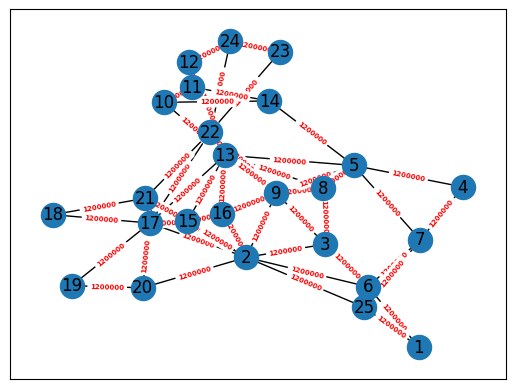

In [3]:
#Draw loaded graph
# spring layout prevents graph from
# becoming too clustered
layout = nx.spring_layout(G)
# draw node, edges, and labels sperately
nx.draw_networkx_labels(G, pos=layout)
nx.draw_networkx_nodes(G, pos=layout)
nx.draw_networkx_edges(G, pos=layout)
# only add capacities as labels
edge_labels = dict([((source, dest), G[source][dest]["capacity"]) for source, dest in G.edges])
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels= edge_labels,font_color="red", font_weight="bold", font_size = 5)

In [4]:
## Get paths
## for each node, find paths to destination node
## paths[(i,j)] = list of paths specified by edges
paths = {}

num_paths = {}

n=25

for i in range(1,n+1):
    for j in range(1,n+1):
        path_gen = nx.all_simple_edge_paths(G, source=i, target=j, cutoff=5)
        p = list(path_gen)
        num_paths[(i,j)] = len(p)
        for k in range(len(p)):
            paths[(i,j,k)] = p[k]

print(paths[1,2,0])


[(1, 6), (6, 3), (3, 9), (9, 2)]


## Step 3: Parse Traffic Demands

In [5]:
demands = np.loadtxt("data/ATT/demand.txt")
## get the maximum value for each column
## reshape demands matrix
demands_matrix = np.amax(demands, axis = 0).reshape(25,25)

demands_dict = {}
for i in range(26):
    for j in range(26):
        demands_dict[(i,j)] = demands[i][j]

## Step 4: Traffic Algorithm: Maximize Total Throughput


In [73]:
#TODO
#Decision variables:

#edge current flows and capacities
flow_matrix = {}
capacity_matrix = {}
for key, value in edge_labels:
    flow_matrix[key] = 0
    capacity_matrix[key] = value



# edge_time, demand = demands_dict


#If flow is 0, edge is not active

#for each edge in edges: set in some array/matrix all the possible edges

#----------------------------

#Optimization function:

#Sum of the flows of all of the edges

model = gb.Model()

edges,capacities = edge_labels.keys(), edge_labels.values()

print(edges)

flow = model.addVars(edges, obj=capacities, name="flow")

model.setObjective(gb.quicksum(flow_matrix.values()), gb.GRB_MAXIMIZE)


#----------------------------

#Constraints: 

#Capacity check: Flow on edge (u, v) <= capacity (u, v)

#Demand reqs: flow into node u = demand u: f_in(u) - f_out(u) = demand(u) https://www.cs.cmu.edu/~ckingsf/bioinfo-lectures/flowext.pdf

#Conservation: Flow into node u = flow out of node u???

# model.addConstr(flow_matrix[(t, u, v)] <= capacity_matrix[t, u, v]])
# model.addConstr(flow_in[t, u] - flow_out[t, u])

dict_keys([(2, 9), (2, 3), (2, 6), (2, 17), (2, 16), (2, 25), (2, 21), (2, 15), (2, 20), (9, 22), (9, 8), (9, 13), (9, 3), (9, 16), (9, 5), (22, 13), (22, 17), (22, 23), (22, 24), (22, 21), (8, 13), (8, 3), (8, 5), (13, 5), (13, 11), (13, 17), (13, 12), (13, 16), (13, 10), (13, 15), (3, 6), (16, 17), (16, 15), (5, 7), (5, 4), (5, 14), (6, 1), (6, 25), (6, 7), (17, 19), (17, 18), (17, 21), (17, 15), (17, 20), (25, 1), (25, 7), (21, 18), (21, 15), (20, 19), (7, 4), (14, 11), (14, 10), (11, 12), (11, 10), (12, 24), (24, 23)])


AttributeError: module 'gurobipy' has no attribute 'GRB_MAXIMIZE'

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 732 rows, 39386 columns and 221772 nonzeros
Model fingerprint: 0x72d79fa2
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+02, 1e+06]
Presolve removed 76 rows and 0 columns
Presolve time: 0.03s
Presolved: 656 rows, 39386 columns, 221772 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.250e+04
 Factor NZ  : 2.828e+04 (roughly 16 MB of memory)
 Factor Ops : 1.483e+06 (less than 1 second per iteration)
 Threads    : 8

Barrier performed 0 iterations in 0.05 seconds (0.07 work units)
Barrier solve interrupted - model solved by another algorithm


Solved with primal simplex
Iteration    Objecti

{(1, 6): Text(0.6946644118927356, 0.050487892410072, '253474.0'),
 (1, 25): Text(0.7375486925522259, 0.006541074266547431, '22179.0'),
 (6, 3): Text(0.36747937082868004, -0.00502439531722549, '440274.0'),
 (6, 2): Text(0.34576751791352317, -0.09714501661456702, '27206.0'),
 (6, 25): Text(0.5259499295808621, -0.07986032929289323, '23787.0'),
 (6, 7): Text(0.5440447473481763, 0.05043365824532628, '122937.0'),
 (6, 1): Text(0.6946644118927356, 0.050487892410072, '60696.0'),
 (3, 9): Text(0.10390339684001741, -0.004599135110619965, '859320.0'),
 (3, 8): Text(0.07546336153961564, 0.025146317766420026, '121963.0'),
 (3, 2): Text(0.23018123982083138, -0.06625590078242385, '108209.0'),
 (3, 6): Text(0.36747937082868004, -0.00502439531722549, '133793.0'),
 (9, 2): Text(0.08219154392486054, -0.09671975640796149, '840707.0'),
 (9, 16): Text(-0.023973858826673255, -0.05661747671539172, '76681.0'),
 (9, 8): Text(-0.07252633435635522, -0.00531753785911762, '162190.0'),
 (9, 3): Text(0.10390339684001

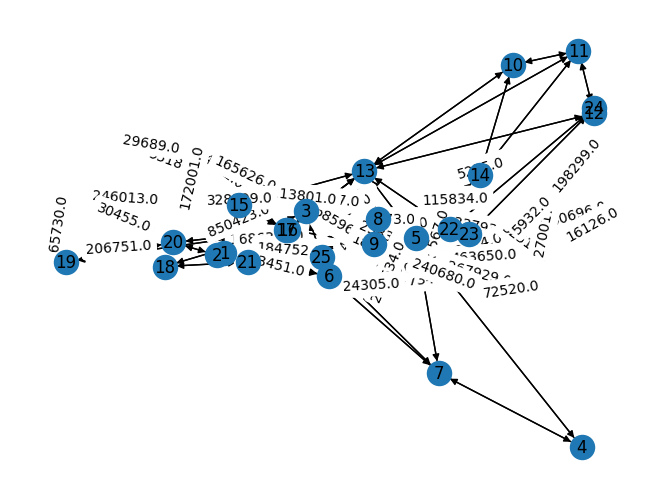

In [16]:
# new model
m = gb.Model("step4")

# add a variable for each tunnel
path_vars = m.addVars(paths, name = "path_flow")

# dictionary mapping edges to variables representing paths edge is in
edge_flow = gb.tupledict([((source, dest), []) for source, dest in G.edges])


# iterate through all paths
for (i,j,k) in path_vars:
    path = paths[(i,j,k)]
    # iterate each edge in a path
    for src,dest in path:
        # add variable to correct edge
        if (src,dest) in edge_flow:
            edge_flow[(src,dest)].append(path_vars[i,j,k])
        else:
            edge_flow[(dest,src)].append(path_vars[i,j,k])

# add capacity constraint
for i,j in edge_flow:
    m.addConstr(sum(edge_flow[(i,j)]) <= edge_labels[(i,j)])

m.addConstrs(path_vars.sum(i,j,'*') <= demands[i][j] for i,j in demands_dict)

m.setObjective(path_vars.sum(), GRB.MAXIMIZE)

m.optimize()

path_vars

G_Prime = nx.DiGraph()

for path_key in path_vars:
    path = paths[path_key]
    val = round(path_vars[path_key].X,0)
    print(val)
    for (src, dest) in path:
        if G_Prime.has_edge(src, dest):
            G_Prime[src][dest]['weight'] += val
        else:
            G_Prime.add_edge(src, dest, weight = val)
        
GPrime_labels = nx.get_edge_attributes(G_Prime, "weight")
nx.draw(G_Prime, arrows = True, with_labels = True)
position_labels = nx.spring_layout(G_Prime)
nx.draw_networkx_edge_labels(G_Prime, pos = position_labels, edge_labels = GPrime_labels)



## Step 5: Traffic Algorithm: Maximize Link Utilization

In [17]:
#Same as step 4 on a new model
m_prime = gb.Model("step5")
path_vars5 = m.addVars(paths, name = "path_flow")
edge_flow5 = gb.tupledict([((source, dest), []) for source, dest in G.edges])

for (i,j,k) in path_vars5:
    path = paths[(i,j,k)]
    for src,dest in path:
        if (src,dest) in edge_flow5:
            edge_flow5[(src,dest)].append(path_vars5[i,j,k])
        else:
            edge_flow5[(dest,src)].append(path_vars5[i,j,k])

# add capacity constraint
for i,j in edge_flow5:
    m_prime.addConstr(sum(edge_flow5[(i,j)]) <= edge_labels[(i,j)])


#***new for step 5*** Need to add constraint that the maximum link value needs to be reduced 

for i,j in edge_flow5:
    #Percentage of load on a link
    #edge_ratio = sum(edge_flow5[(i,j)])/edge_labels[(i,j)]
    m_prime.setObjective(sum(edge_flow5[(i,j)])/edge_labels[(i,j)], GRB.MINIMIZE)

#having demand bounded like this will push all nodes to have "0" for flow, so we want to maximize the throughput as well (which is why we reuse step 4 constraints)

m_prime.addConstrs(path_vars5.sum(i,j,'*') <= demands[i][j] for i,j in demands_dict)

m_prime.setObjective(path_vars5.sum(), GRB.MAXIMIZE)

m_prime.optimize()

path_vars5

#Alternative written of step 4 visualization using edge_flows:
G_Prime2 = nx.DiGraph()

for i,j in edge_flow5:
    G_Prime2.add_edge(i, j, weight = sum(edge_flow5[i,j]))

GPrime2_labels = nx.get_edge_attributes(G_Prime2, "weight")
nx.draw(G_Prime2, arrows = True, with_labels = True)
position_labels2 = nx.spring_layout(G_Prime2)
nx.draw_networkx_edge_labels(G_Prime2, pos = position_labels2, edge_labels = GPrime2_labels)


GurobiError: Variable not in model

## Step 6: Compare Algorithms

TODO

## Step 7 (EXTRA CREDIT): Scaling with Topology Size